# SVM ( Support Vector Machine):

## Task 1: Exploratory Data Analysis (EDA):


In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\mushroom.csv")

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.shape

(2000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [7]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [9]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [10]:
z = df.corr(numeric_only=True)
z

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


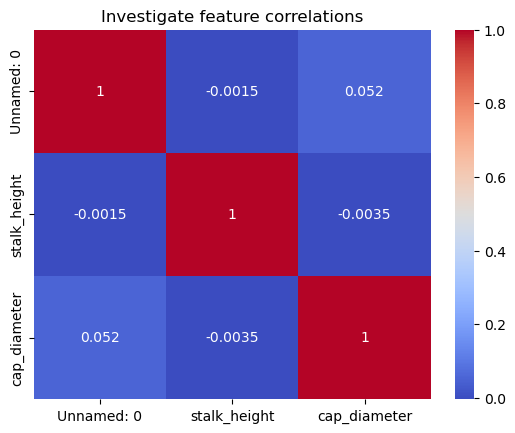

<Figure size 1200x900 with 0 Axes>

In [15]:
sns.heatmap(z, annot=True,cmap="coolwarm")
plt.title("Investigate feature correlations")
plt.figure(figsize=(12,9))
plt.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'stalk_height'}>],
       [<Axes: title={'center': 'cap_diameter'}>, <Axes: >]], dtype=object)

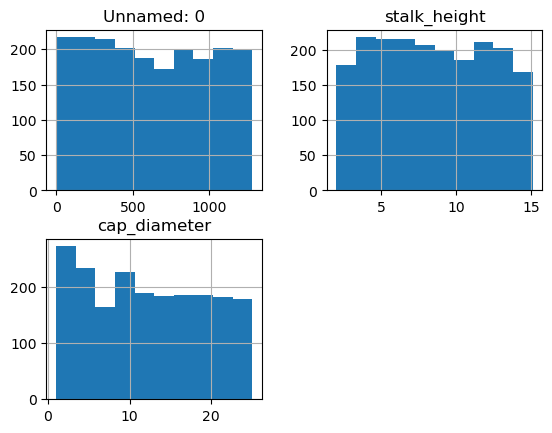

In [21]:
# Histogram
df.hist()     

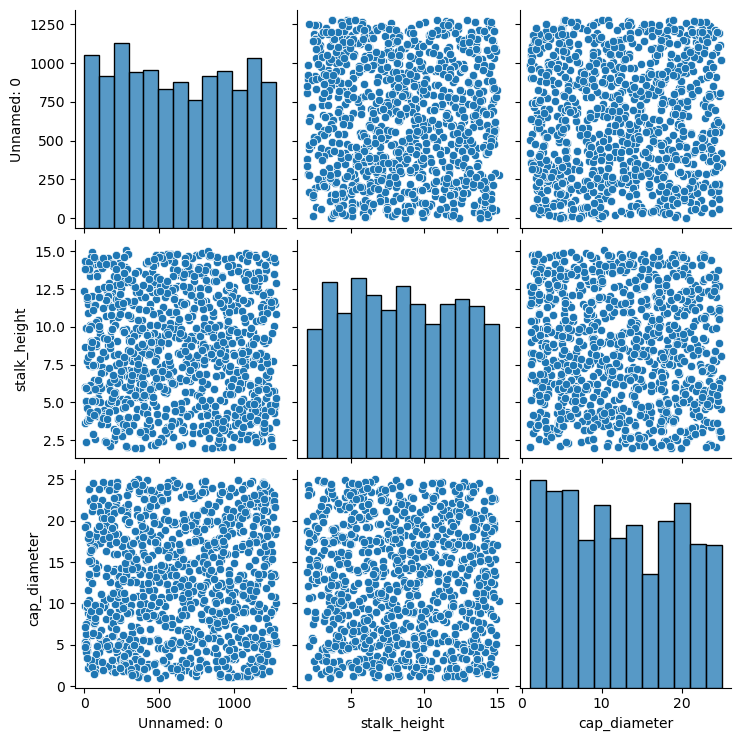

In [20]:
# pair plot
sns.pairplot(df)

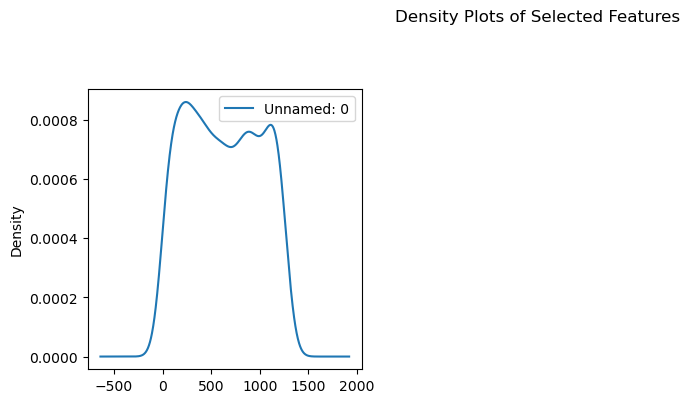

In [23]:
# Density plot 
df.iloc[:, :6].plot(kind='density', subplots=True, layout=(2, 3), figsize=(12, 8), sharex=False)
plt.suptitle("Density Plots of Selected Features")
plt.show()

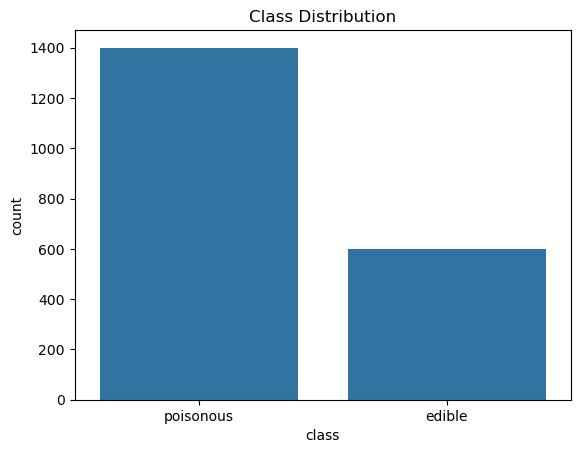

In [24]:
sns.countplot(x=df['class'])
plt.title("Class Distribution")
plt.show()

## Task 2: Data Preprocessing:

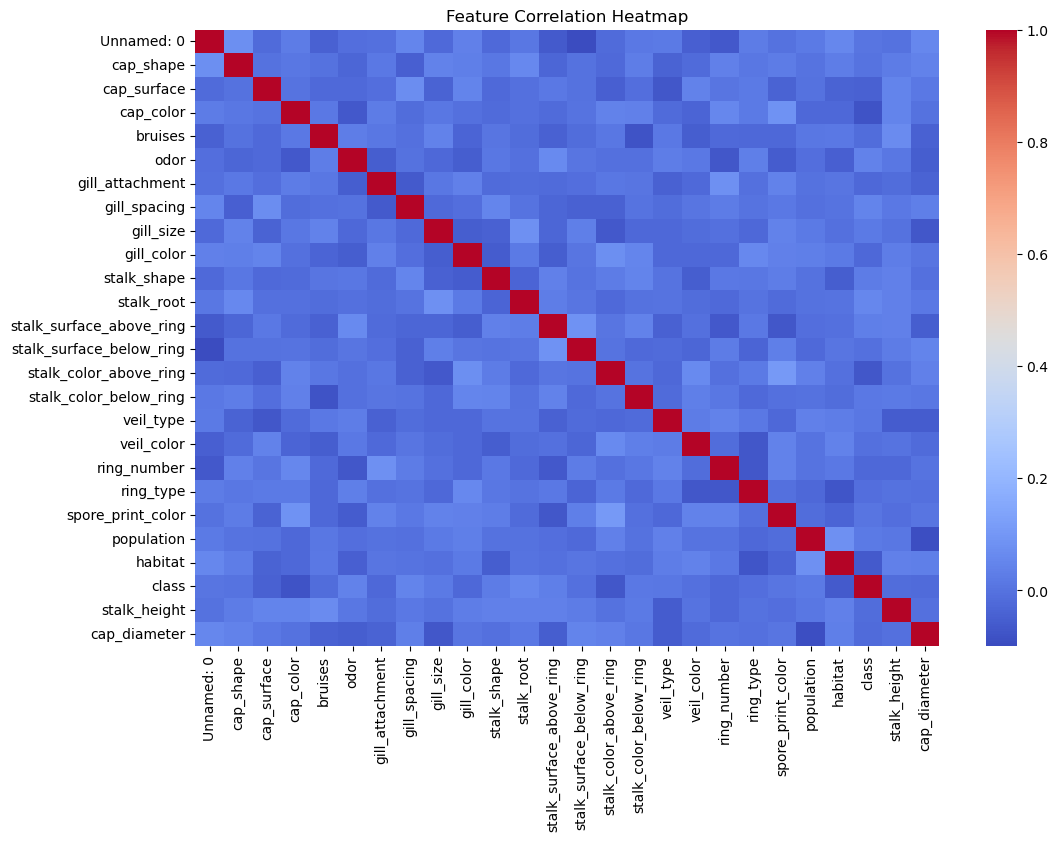

In [26]:
# Converting categorical data to numerical
df_encoded = df.apply(LabelEncoder().fit_transform)
corr = df_encoded.corr()

# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [27]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['class'])  # Independent variables
y = df_encoded['class']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
le

LabelEncoder()

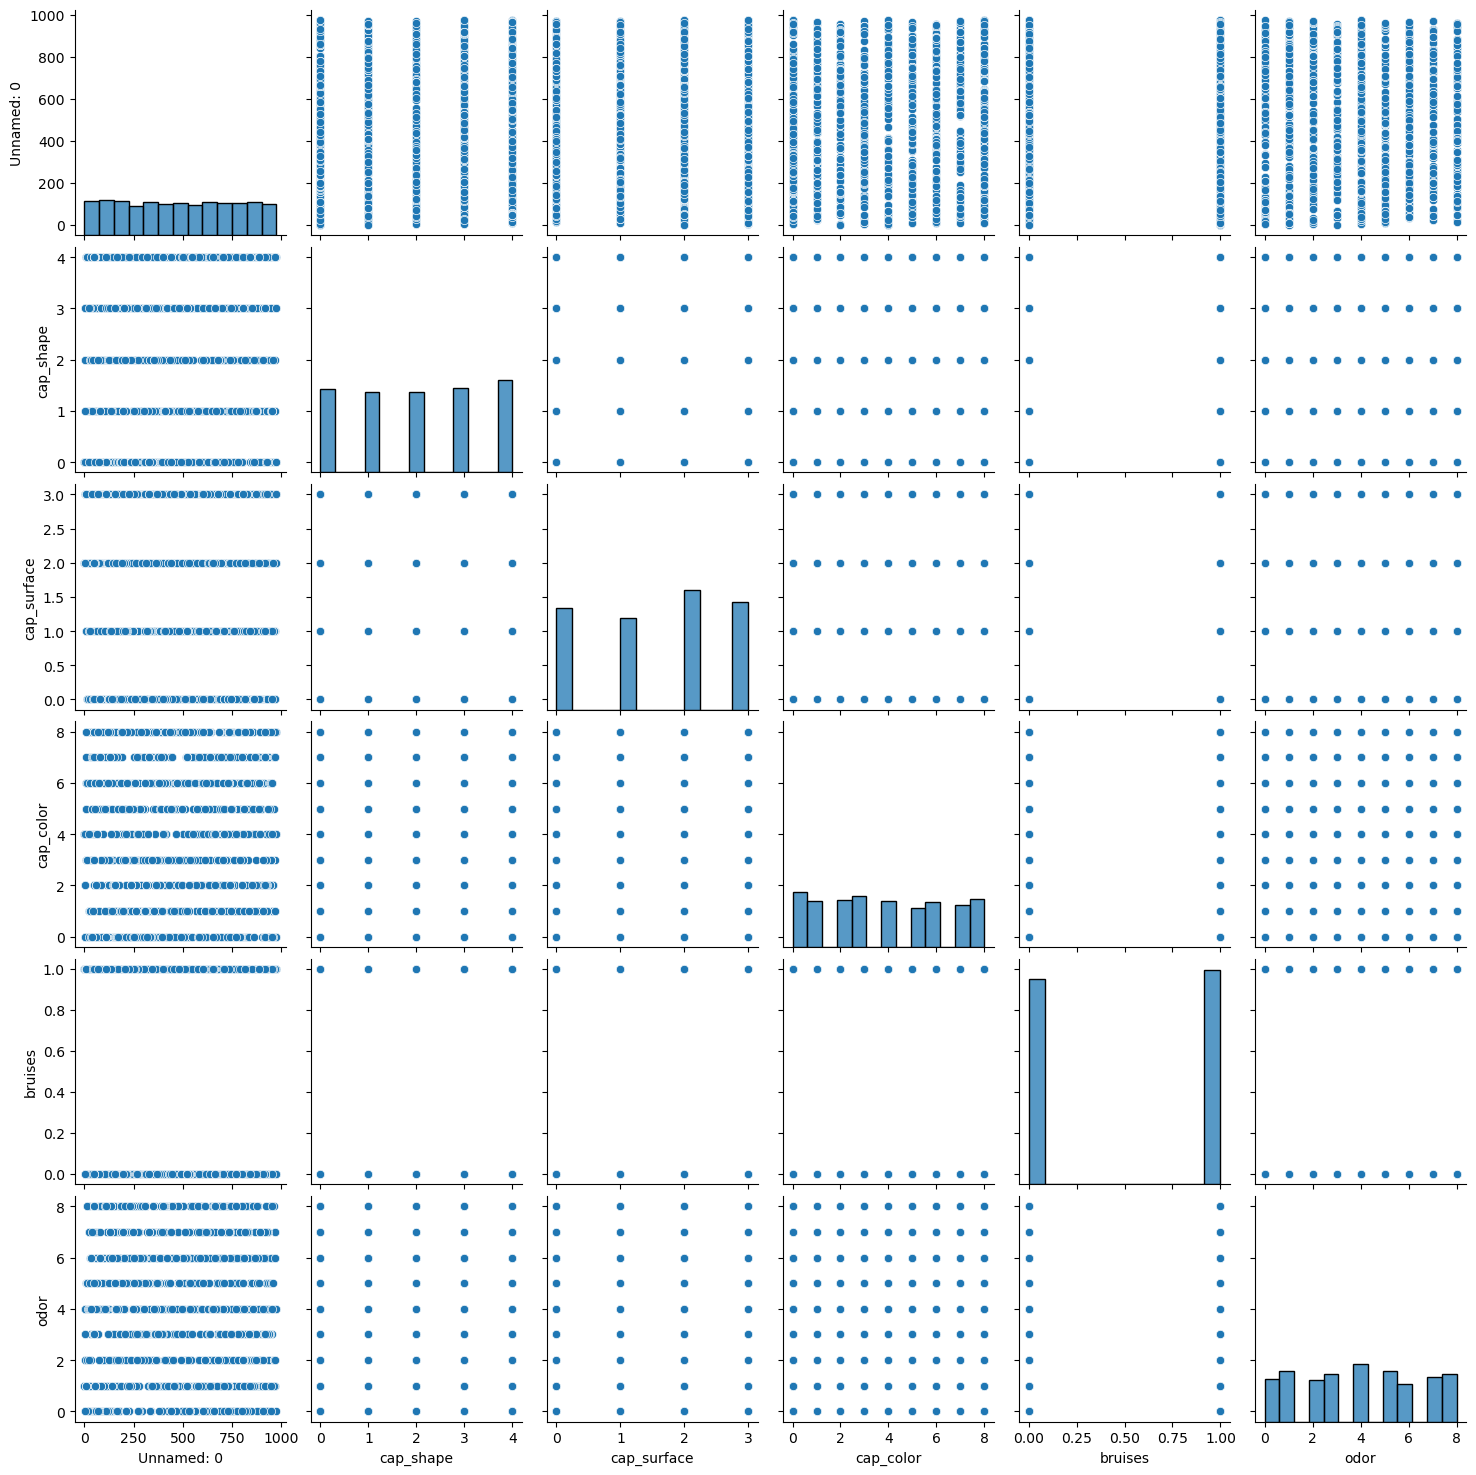

In [30]:
# Pairplot for feature relationships 

sns.pairplot(df_encoded.iloc[:, :6]) 
plt.show()

## Task 4: SVM Implementation:

In [31]:
# SVM Model
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Score: 0.6675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



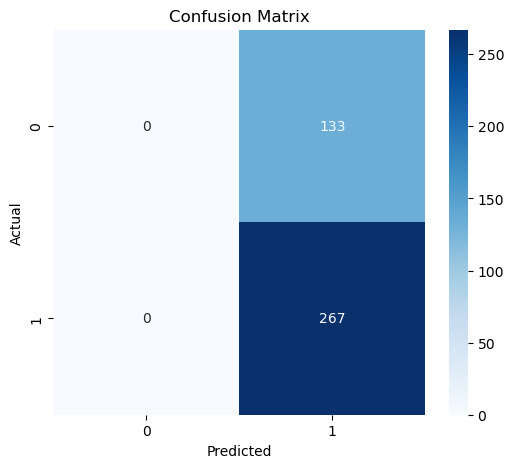

In [32]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred) 
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", cr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Task 6: Parameter Tuning and Optimization:

In [38]:
# 1.Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy)
    print("\n")

Kernel: linear
Accuracy: 0.6675


Kernel: poly
Accuracy: 0.6675


Kernel: rbf
Accuracy: 0.6675


Kernel: sigmoid
Accuracy: 0.5325




## Task 7: Comparison and Analysis:

### Strengths of SVM:

- Works well with high-dimensional data.
- Effective for both linear and non-linear problems using kernel trick.
- Robust against overfitting with proper regularization.

### Weaknesses:

- Computationally expensive for large datasets.
- Sensitive to hyperparameters and kernel selection.
- Practical Implications:

- Can be used for medical diagnoses, text classification, and fraud detection.

Kernel: linear
Accuracy: 0.6675


Kernel: poly
Accuracy: 0.6675


Kernel: rbf
Accuracy: 0.6675


Kernel: sigmoid
Accuracy: 0.5325




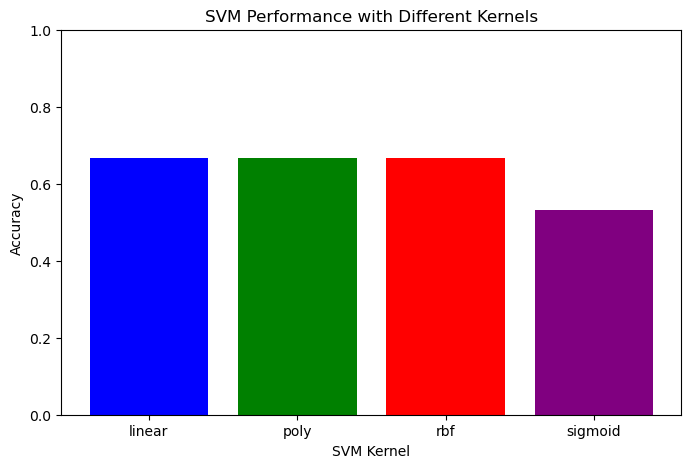

In [37]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("SVM Kernel")
plt.ylabel("Accuracy")
plt.title("SVM Performance with Different Kernels")
plt.ylim(0, 1)
plt.show()